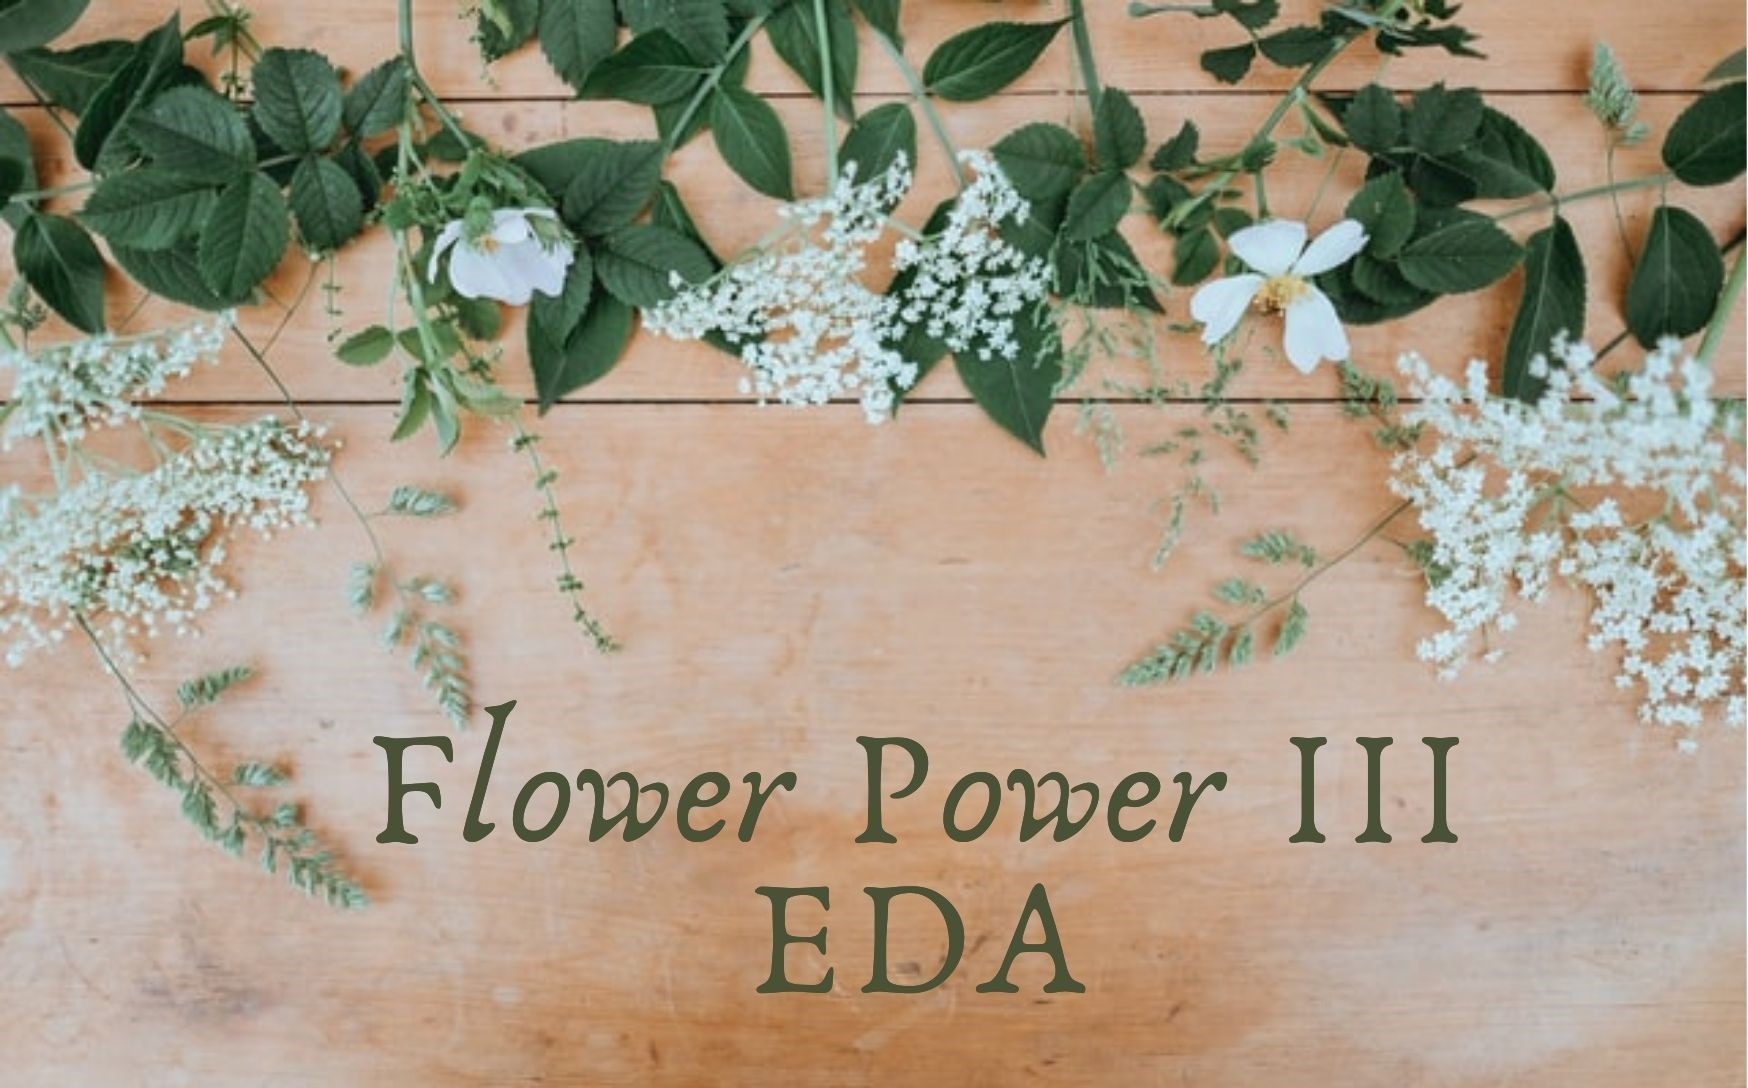

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

%matplotlib inline

In [2]:
# Loading the excel file
data = pd.read_excel ('.\Flowers-new.xlsx')

<strong>Pandas profiling</strong> is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. Besides, if this is not enough to convince us to use this tool, it also generates interactive reports in web format that can be presented to any person, even if they don’t know programming.
In short, what pandas profiling does is save us all the work of visualizing and understanding the distribution of each variable. It generates a report with all the information easily available.

In [3]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

 <p style="font-style: italic">The report generates a lot of valuable information regarding the data - missing values, distinct values, value count, etc. It also displays the first and last 10 rows of the dataset.</p>

In [4]:
data['english_name'].unique()

array(['Wood Anemone', 'Red Dead-nettle ', 'Red Dead-nettle',
       'Lesser Celandine', 'Common Dandelion', 'Lesser Celandine\xa0',
       'Daisy', 'Chickweed', 'Marsh-marigold ', 'Marsh-marigold',
       'Cuckooflower ', 'Cuckooflower', 'Butterbur', "Miner's Lettuce",
       "Miner's Lettuce ", 'Cow Parsley', 'Thale Cress', 'Common Nettle',
       'Common Water-crowfoot ', 'Green Alkanet', 'White Nettle',
       'Bittercress', 'Redstem Filaree\xa0', 'Field forgot-me-not',
       "Dove's-foot Crane's Bill", 'Creeping Buttercup', 'Marsh Valerian',
       'Ribwort Plantain', 'Bugle ', 'Marsh Thistle', 'Yellow Flag',
       'Bluebell', 'Red Clover', 'Sorrel', 'Ox-eye Daisy ',
       'Ragged-robin', 'Turnip Rape', 'Common Vetch', 'Greater Celandine',
       'Flatweed', 'Groundsel', 'White Clover', 'Marsh Lousewort',
       'Comfrey', "Shepherd's Purse", 'Field pansy', 'Lesser Trefoil',
       'Field Mouse-ear', 'Meadow Buttercup', 'Common Lousewort',
       'True Forget-me-not ', 'Hidcote

In [5]:
len(data['english_name'].unique())

129

 <p style="font-style: italic"> In the previous two steps, we noticed that some of the unique names are repeating due to the whitespaces at the end of a few cells. Furthermore, an example can be observed in the first row. Thus, we had to remove each empty space at the end of each cell. The code for this is shown in the next line.</p>

In [6]:
data['english_name']=data['english_name'].str.replace(' +$', '')

<ipython-input-6-c266056b52e1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['english_name']=data['english_name'].str.replace(' +$', '')


In [7]:
# Number of unique names after removing all whitespaces at the end. 
len(data['english_name'].unique())

122

 <p style="font-style: italic"> In the next line, we are replacing "/" with "," in the landscape column for future histogram visualizations </p>

In [8]:
data['landscape'] = data['landscape'].str.replace("/",', ')

<p style = "font-style: italic"> Since the date is only filled for the first row per visit, the following code fills in the NaN values of the rows with missing data. The funcition used is ‘ffill’ which stands for ‘forward fill’ and replaces the missing values with the corresponding value in the previous row. </p>

In [9]:
data['date'] = data['date'].ffill()

 <p style="font-style: italic"> Since many of the rows have NaN values, in the line below we are replacing them with a string "no data"</p>

In [10]:
data.fillna('no data', inplace=True)

 <p style="font-style: italic"> For the visualizations, we want to extract the month in a separate column. To do this, we are converting the date object format to datetime format and then extracting the month.</p>

In [11]:
data['date'] = pd.to_datetime(data.date)

In [12]:
data['month'] = data['date'].dt.strftime('%B')

In [13]:
data.head()

,date,landscape,location,photo_id,english_name,unit,other_flower,month
0,2021-04-02,no data,Helmond | Warandabos,_B4A2382,Wood Anemone,Single flower,no data,April
1,2021-04-02,no data,Helmond | Warandabos,_B4A2389,Wood Anemone,Single flower,no data,April
2,2021-04-02,no data,Helmond | Warandabos,_B4A2399,Wood Anemone,Single flower,no data,April
3,2021-04-02,no data,Helmond | Warandabos,_B4A2402,Wood Anemone,Single flower,no data,April
4,2021-04-02,no data,Helmond | Warandabos,_B4A2403,Wood Anemone,Single flower,no data,April


In [14]:
sns.set_theme(style="darkgrid")

Text(0.5, 1.0, 'Number of units')

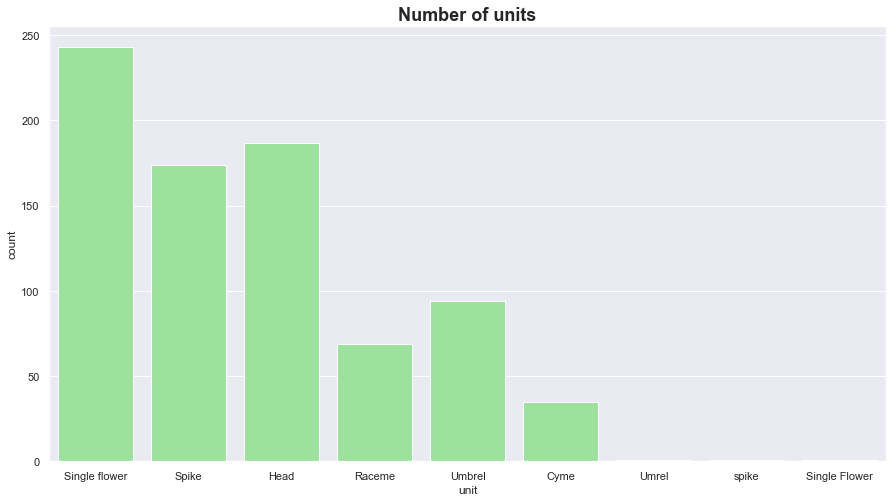

In [15]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x="unit", data=data, color = 'lightgreen')
ax.set_title('Number of units', fontsize = 18, fontweight='bold')

 <p style="font-style: italic"> In the graph above, we have plotted all types of units and we can clearly observe that there have been made two typing mistakes. Therefore, we are replacing the single values with the same name as the unit with multiple values. ("spike - Spike; "Umrel - Umbrel"). The lines below show this process and the next graph displays that the values are correclty replaced. </p>

In [16]:
data['unit'] = data['unit'].str.replace('spike','Spike')
data['unit'] = data['unit'].str.replace('Umrel','Umbrel')
data['unit'] = data['unit'].str.replace('Single Flower','Single flower')

Text(0.5, 1.0, 'Number of units')

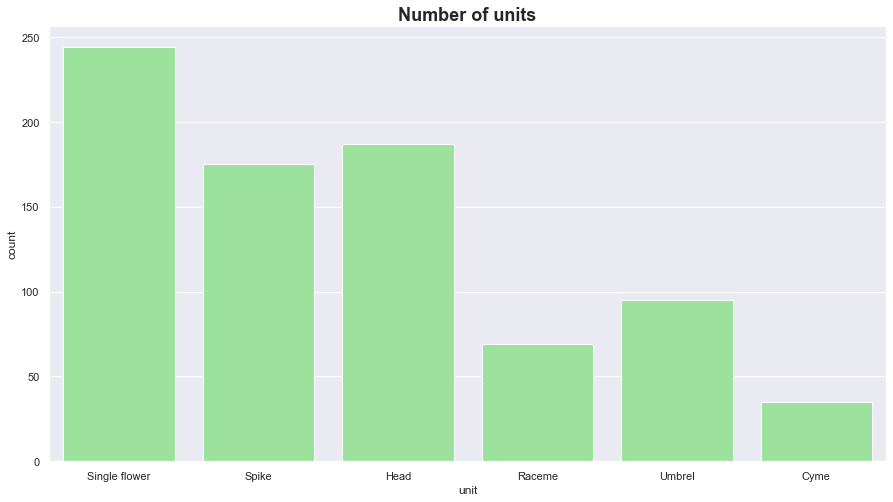

In [17]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x="unit", data=data, color = 'lightgreen')
ax.set_title('Number of units', fontsize = 18, fontweight='bold')

Text(0.5, 1.0, 'Number of flower photos per city and month')

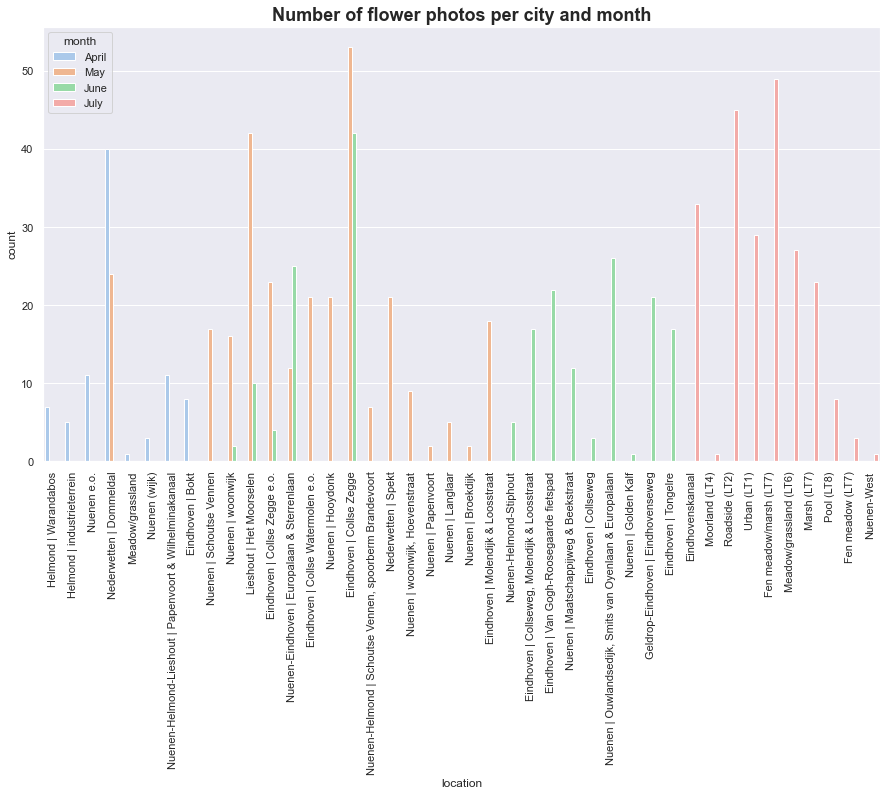

In [18]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x="location", hue = "month", data=data, palette = 'pastel')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('Number of flower photos per city and month', fontsize = 18, fontweight='bold')

 <p style="font-style: italic"> In the graph above, we are plotting the distribution of flowers per city and month. There are a few instances where a location consists of multiple cities, as well as cities are repeating. The reason for that might be because the images were taken in various districts of the cities. Furthermore, this data needs to be handeled properly after discussing it with the client. </p>

Text(0.5, 1.0, 'Number of flower images per lansdcape and month')

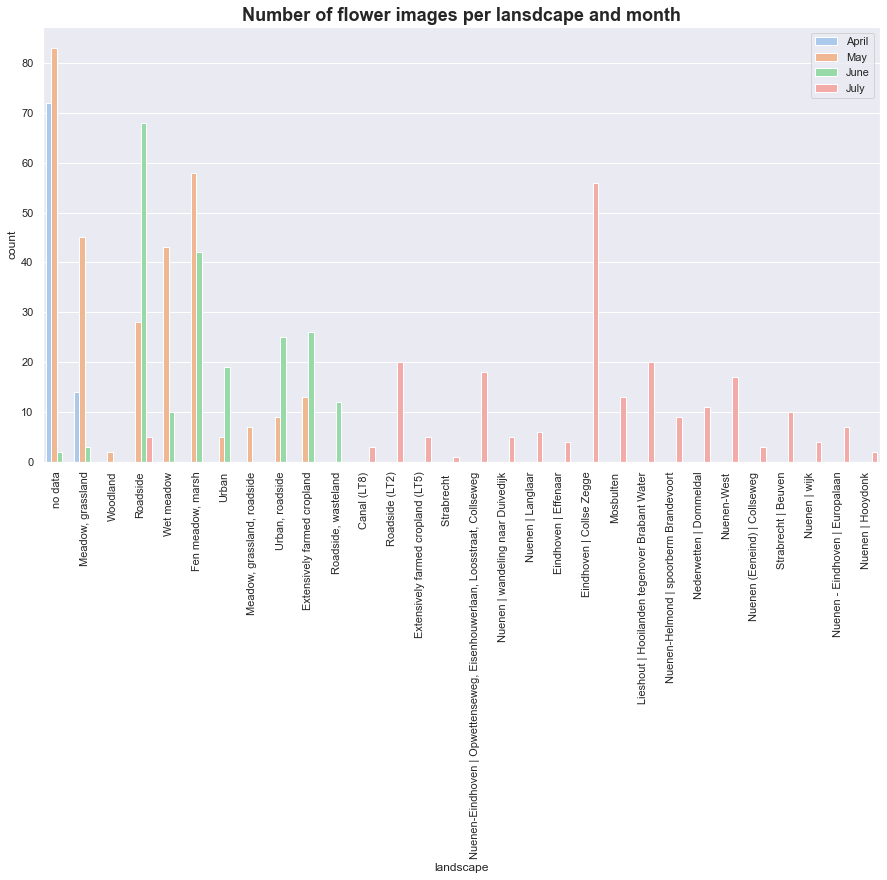

In [20]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x="landscape", hue = "month", data=data, palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.legend(loc='upper right')
ax.set_title('Number of flower images per lansdcape and month', fontsize = 18, fontweight='bold')

 <p style="font-style: italic"> In this graph we are showing the number of flower photos per landscape and month. There are a few examples where a landscape has multiple areas. Thiss data needs to be handeled properly after discussing it with the client as well. </p>

<strong> Number of flowers per species </strong>

<p style="font-style: italic"> Below, we aim to display the number of flowers per species. The first thing to be considered is to count values of the english names and place it in a dataframe. Secondly, we create another dataframe consisting only the unique flower names. Then, we join the two dataframes and rename the second column to "count". </p>

In [21]:
count=data['english_name'].value_counts()
df_count = pd.DataFrame(count)
df_count.reset_index(drop=True, inplace=True)
df_count

,english_name
0,27
1,24
2,21
3,20
4,18
...,...
117,1
118,1
119,1
120,1


In [24]:
df_names = pd.DataFrame(data.english_name.unique(), columns=['name'])
df_names

,0
0,Wood Anemone
1,Red Dead-nettle
2,Lesser Celandine
3,Common Dandelion
4,Lesser Celandine
...,...
117,Water Mint
118,European Water-plantain
119,Broadleaf Plantain
120,Black Medick


In [23]:
df_nrPerSpecies = pd.concat([df_names, df_count], axis=1, join="inner")
df_nrPerSpecies

,name,english_name
0,Wood Anemone,27
1,Red Dead-nettle,24
2,Lesser Celandine,21
3,Common Dandelion,20
4,Lesser Celandine,18
...,...,...
117,Water Mint,1
118,European Water-plantain,1
119,Broadleaf Plantain,1
120,Black Medick,1


In [210]:
df_nrPerSpecies=df_nrPerSpecies.rename(columns={'english_name': 'count'})
df_nrPerSpecies

,name,count
0,Wood Anemone,27
1,Red Dead-nettle,24
2,Lesser Celandine,21
3,Common Dandelion,20
4,Lesser Celandine,17
...,...,...
85,Bladder Campion,1
86,Kidney Vetch,1
87,Common Bugloss,1
88,Hungarian Mullein,1


<p style="font-style: italic"> From the above dataframe, it can be seen that there is only one instance of this flower species. In this case, it might be difficult for the model to learn, even with augmentation taken into consideration. Therefore, we decided to plot only the ones that have at least 5 (or more) examples. </p>

In [211]:
df_count5  = df_nrPerSpecies[df_nrPerSpecies['count'] >= 5]
df_count5

,name,count
0,Wood Anemone,27
1,Red Dead-nettle,24
2,Lesser Celandine,21
3,Common Dandelion,20
4,Lesser Celandine,17
5,Daisy,17
6,Chickweed,17
7,Marsh-marigold,16
8,Cuckooflower,16
9,Butterbur,15


Text(0.5, 0, 'Number of flowers')

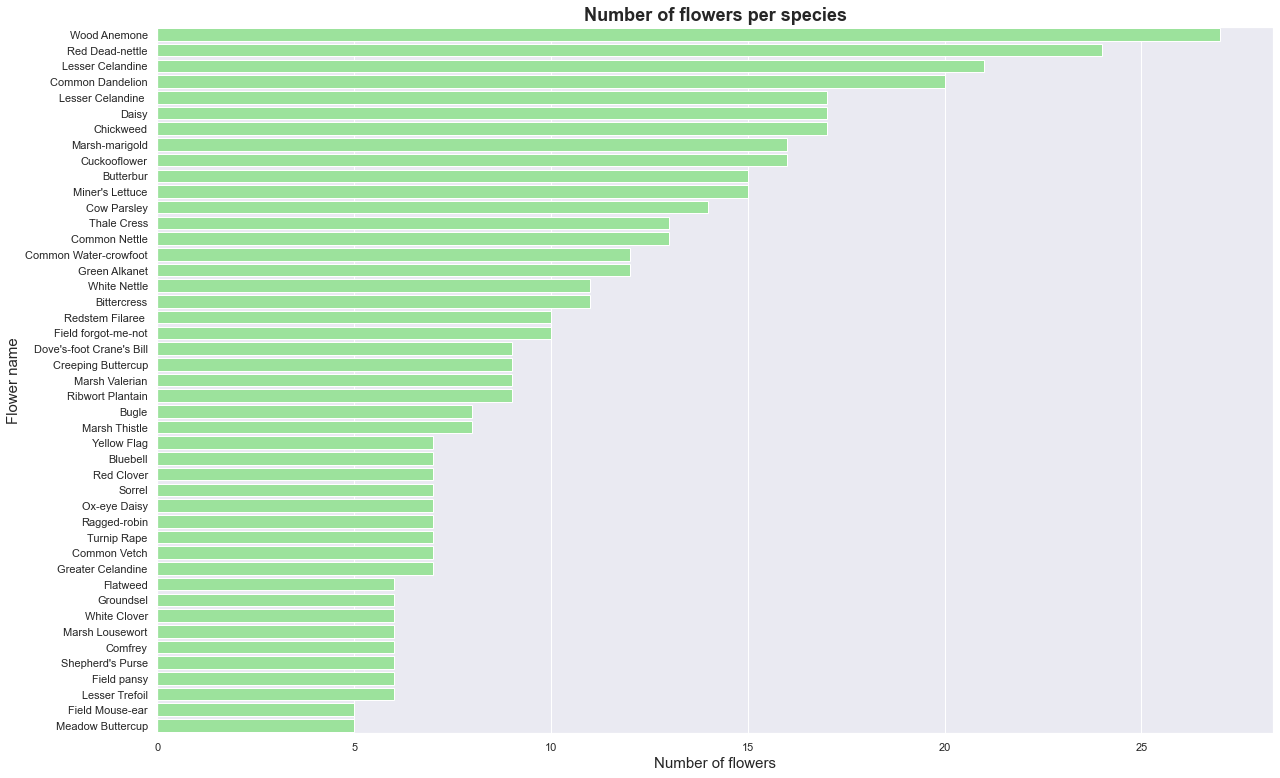

In [212]:
plt.figure(figsize = (20,13))
ax = sns.barplot(x = "count", y = "name", data= df_count5, color="lightgreen")
ax.set_title('Number of flowers per species', fontsize = 18, fontweight='bold')
ax.set_ylabel('Flower name',  fontsize = 15)
ax.set_xlabel('Number of flowers', fontsize = 15)

<p style="font-style: italic"> In the graph above, the flower species are displayed in descending order. </p>

<strong> Conclusion </strong>
<p style="font-style: italic"> As a group we can conclude that there were a lot of discrepancies in the dataset provided. With this EDA, we were able to handle them in order to make more consistant and reliable data visualisations. From these graphs, we could observe that most of the pictures were taken in May and bigger part of the flowers are of unit "single flower". However, with this data analysis, our group could not get many essential insights that would be beneficial for the future model. </p>